## K最近鄰 - K-nearest neightbor classifer, KNN  

這個演算法的想法很簡單，相同類別的資料，它們的特徵值應該都很接近。因此如果想知道某個東西是屬於哪個類別的，就看看跟他特徵值比較接近的k個鄰居是屬於哪一個類別，它就是屬於那個類別。舉個例子：你在路上看到一個外個人，皮膚是黑色的，英文又講很好，你會猜他的哪一個人？你會回想自己過去經驗裡，皮膚是黑色的，英文又講很好的大多是哪一國人然後給出答案。K最近鄰的想法就是如此。當看見一筆未知資料時，它就找找跟它特徵值最相「近」的「K個資料」的結果是什麼，再依此判斷給出答案。

學習k最近鄰時，你要知道：
* 如何去定義遠和近：一般用歐氏距離。
* 另一個是要選取幾個鄰居(參數k)

## 1 載入資料
本章仍使用上一章的資料，同樣兩個欄位和後五十筆資料。因為資料的檢查和探索在上一章已做過，本章就省略。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df = df[['sepal width (cm)', 'petal length (cm)','target']]
df = df.iloc[50:]
df.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
X = df.drop('target', axis=1)
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# 初始物件
model = KNeighborsClassifier()
# 機器學習
model.fit(X_train, y_train)
# 正確率的預測，model.score提供了簡便的正確率輸出方式
model.score(X_test, y_test)

0.8787878787878788

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
model_pl = make_pipeline(StandardScaler(),
                         KNeighborsClassifier())
model_pl.fit(X_train, y_train)
model_pl.score(X_test, y_test)

0.8787878787878788

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model_pl.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.88
混亂矩陣
[[17  2]
 [ 2 12]]
綜合報告
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.86      0.86      0.86        14

    accuracy                           0.88        33
   macro avg       0.88      0.88      0.88        33
weighted avg       0.88      0.88      0.88        33



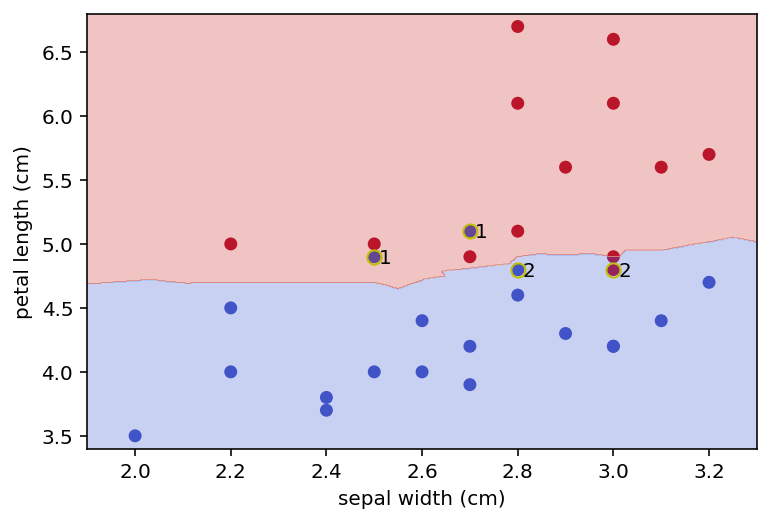

In [ ]:
def plot_decision_boundary(X_test, y_test, model, debug=False):
    points = 500
    x1_max, x2_max = X_test.max()
    x1_min, x2_min = X_test.min()

    X1, X2 = np.meshgrid(np.linspace(x1_min-0.1, x1_max+0.1, points),
                        np.linspace(x2_min-0.1, x2_max+0.1, points))
    x1_label, x2_label = X_test.columns
    fig, ax = plt.subplots()
    X_test.plot(kind='scatter', x=x1_label, y=x2_label, c=y_test, cmap='coolwarm',
                colorbar=False, figsize=(6,4), s=30, ax=ax)
    grids = np.array(list(zip(X1.ravel(), X2.ravel())))
    ax.contourf(X1, X2, model.predict(grids).reshape(X1.shape), alpha=0.3,
               cmap='coolwarm')
    if debug:
        df_debug = X_test.copy()
        df_debug['y_test'] = y_test
        y_pred = model.predict(X_test)
        df_debug['y_pred'] = y_pred
        df_debug = df_debug[y_pred != y_test]
        df_debug.plot(kind='scatter', x=x1_label, y=x2_label,
                      s=50,  color='none', edgecolor='y', ax=ax)
        for i in df_debug.index:
            ax.text(s=df_debug.loc[i,'y_test'], x=df_debug.loc[i, x1_label]+0.01,
                       y=df_debug.loc[i, x2_label]-0.05)

plot_decision_boundary(X_test, y_test, model, True)

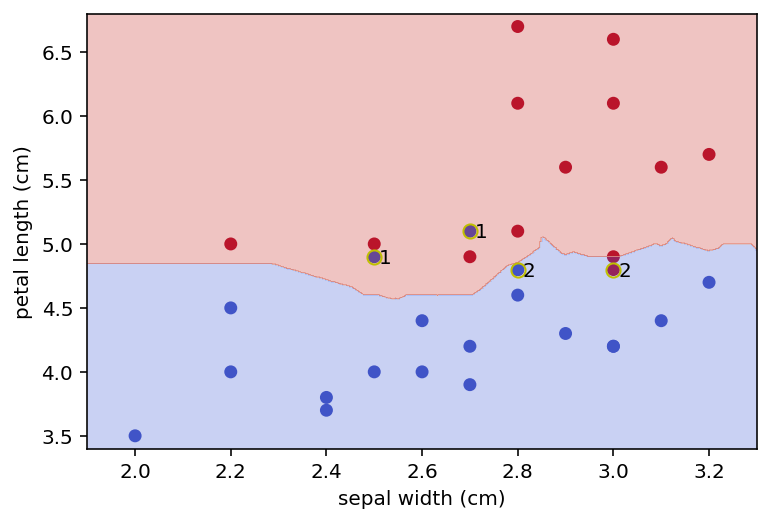

In [ ]:
plot_decision_boundary(X_test, y_test, model_pl, True)

In [ ]:
accs = []
for n in range(3,8):
    model_pl = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    model_pl.fit(X_train, y_train)
    print(f'鄰居數{n}，整體正確率：{model_pl.score(X_test, y_test).round(2)}')

鄰居數3，整體正確率：0.85
鄰居數4，整體正確率：0.82
鄰居數5，整體正確率：0.88
鄰居數6，整體正確率：0.85
鄰居數7，整體正確率：0.88


In [ ]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df = df.iloc[50:]
# 資料分割
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)
# 羅吉斯迴歸
from sklearn.linear_model import LogisticRegression
model_pl_lr = make_pipeline(StandardScaler(),
                            LogisticRegression(solver='liblinear'))
model_pl_lr.fit(X_train, y_train)
print(f'羅吉斯迴歸正確率{model_pl_lr.score(X_test, y_test).round(3)}')
# KNN
model_pl_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_pl_knn.fit(X_train, y_train)
print(f'KNN正確率{model_pl_knn.score(X_test, y_test).round(3)}')

羅吉斯迴歸正確率0.939
KNN正確率0.909


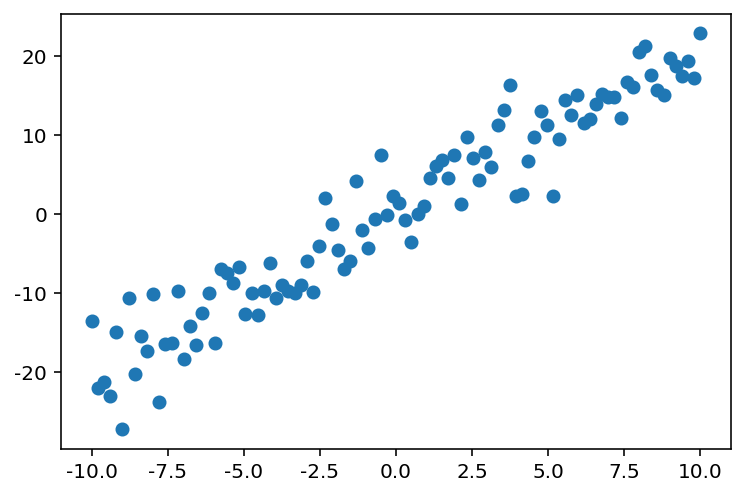

In [ ]:
np.random.seed(1)
x = np.linspace(-10, 10, 100)
y = 2 * x + 4*np.random.randn(100)
df_pca = pd.DataFrame(zip(x,y), columns=['x0','x1'])
plt.scatter(x, y);

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(df_pca)
X_pca[:5]

array([[16.64465063],
       [24.34275306],
       [23.58673821],
       [25.12086528],
       [17.60504644]])

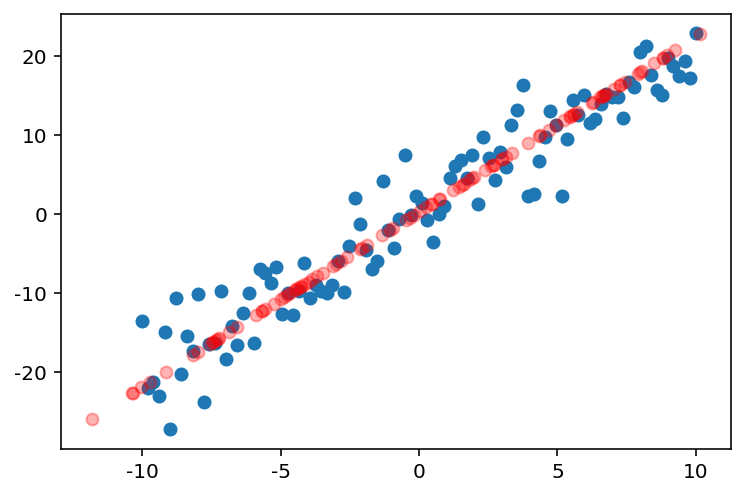

In [ ]:
# 原本資料
plt.scatter(x, y)
# 將X_pca轉到原本的資料維度
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_new[:,0], X_new[:,1], c='r', alpha=0.3);

In [ ]:
print(f'PCA的轉換係數：{pca.components_}')
xy_0 = np.array([x[0],y[0]])
print(f'第一筆原始資料：{xy_0}')
# 進行內積
print(f'自行運算的內積結果：{np.sum(pca.components_ * xy_0)}')
print(f'主成分的第一筆資料：{X_pca[0]}')

PCA的轉換係數：[[-0.41212534 -0.91112716]]
第一筆原始資料：[-10.         -13.50261855]
自行運算的內積結果：16.42385589968553
主成分的第一筆資料：[16.64465063]


In [ ]:
model_pl = make_pipeline(StandardScaler(),
                         PCA(n_components=2),
                         KNeighborsClassifier())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
print('整體正確率:',accuracy_score(y_test, y_pred).round(2))

整體正確率: 0.85


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
selector.get_support()

array([False, False,  True,  True])

In [ ]:
X_test.columns[selector.get_support()]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
model_pl = make_pipeline(StandardScaler(),
                        SelectKBest(f_classif, k=2),
                        KNeighborsClassifier())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('整體正確率:',accuracy_score(y_test, y_pred).round(2))

[[19  0]
 [ 2 12]]
整體正確率: 0.94


## 作業
1. 請用鳶尾花資料集，並用全部的欄位和資料來做預測。  
    * 請不要用管道器，自己把所有過程用程式出來。資料要進行標準化、主成分分析(n_components=2)和k最近鄰。  
    * 請用管道器再做一次，並比較結果。